# 作業目標:
    了解 Padding 的作法
    
    了解 Pooling 的作法

# 作業重點:
    (1) 調整Padding 的設定, 看 Pad 後的結果
    
    (2) 調整Pooling 的設定, 看 Poolin 後的結果

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在Jupyter cell 之內
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) #  設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [2]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    對image X 做 zero-padding. 
    參數定義如下:
    X -- python numpy array, 呈現維度 (m, n_H, n_W, n_C), 代表一批 m 個圖像
         n_H: 圖高, n_W: 圖寬, n_C: color channels 數
    pad -- 整數, 加幾圈的 zero padding.
    Returns:
    X_pad -- image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) 做完zero-padding 的結果
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  
    return X_pad

x.shape = (2, 8, 8, 3)
x_pad.shape = (2, 10, 10, 3)
x[1,1] = [[ 0.62336218 -0.43495668  1.40754   ]
 [ 0.12910158  1.6169496   0.50274088]
 [ 1.55880554  0.1094027  -1.2197444 ]
 [ 2.44936865 -0.54577417 -0.19883786]
 [-0.7003985  -0.20339445  0.24266944]
 [ 0.20183018  0.66102029  1.79215821]
 [-0.12046457 -1.23312074 -1.18231813]
 [-0.66575452 -1.67419581  0.82502982]]
x_pad[1,1] = [[ 0.          0.          0.        ]
 [ 1.90465871  1.1110567   0.6590498 ]
 [-1.62743834  0.60231928  0.4202822 ]
 [ 0.81095167  1.04444209 -0.40087819]
 [ 0.82400562 -0.56230543  1.95487808]
 [-1.33195167 -1.76068856 -1.65072127]
 [-0.89055558 -1.1191154   1.9560789 ]
 [-0.3264995  -1.34267579  1.11438298]
 [-0.58652394 -1.23685338  0.87583893]
 [ 0.          0.          0.        ]]


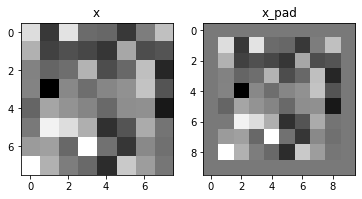

In [8]:
np.random.seed(1)

x = np.random.randn(2, 8, 8, 3) #產生gray image
x_pad = zero_pad(x, 1) # 加一圈 Pad
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [10]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    設計一個前行網路的池化層
    參數定義如下:
    A_prev -- 輸入的numpy 陣列, 維度 (m, n_H_prev, n_W_prev, n_C_prev)
    hparameter 超參數 --  "f" and "stride" 所形成的python 字典
                          有兩個hyperparameters：
                          "f": Pooling filter 的維度, "stride": 移動的步數
    mode -- 池化的模式: "max" or "average"
    
    返回:
        A -- 輸出的池化層, 維度為 (m, n_H, n_W, n_C) 的 numpy 陣列
        cache -- 可以應用在 backward pass pooling layer 資料, 包含 input and hparameter
    """

    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
 
    # 檢索超參數 from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # 定義輸出的dimensions
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### 程式起始位置  ###
    for i in range(m): # 訓練樣本的for 迴圈
        for h in range(n_H): # 輸出樣本的for 迴圈, 針對vertical axis
            for w in range(n_W): #  輸出樣本的for 迴圈, 針對 horizontal axis
                for c in range (n_C): #  輸出樣本的for 迴圈, 針對channels

                     # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第i個訓練示例
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    # 計算輸入data 的池化結果. 使用 if statment 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

                        ### 程式結束  ###
    
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

In [24]:
np.random.seed(1)
A_prev = np.random.randn(2, 8, 8, 3)
print("A_prev.shape =", A_prev.shape)
# "f": Pooling filter 的維度 2*2 , "stride": 移動的步數 2
hparameters = {"stride" : 2, "f": 2}  
A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print("A.shape =", A.shape)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)
print("A.shape =", A.shape)

A_prev.shape = (2, 8, 8, 3)
mode = max
A = [[[[ 1.62434536  0.86540763  0.53035547]
   [ 1.74481176  1.46210794  0.3190391 ]
   [ 0.74204416  0.2344157   1.65980218]
   [ 1.14472371  1.6924546   2.10025514]]

  [[ 0.16003707  0.87616892  0.82797464]
   [ 0.93110208  0.76201118  0.88514116]
   [ 0.37756379  1.25286816  1.12948391]
   [ 1.19891788  1.51981682  2.18557541]]

  [[ 1.96710175  0.04359686  1.27375593]
   [ 1.62765075  0.74055645 -0.60392063]
   [ 0.31515939  0.84616065  0.79280687]
   [ 0.80186103  1.12141771  0.75041164]]

  [[ 2.19069973  2.52832571  0.68255141]
   [ 2.18697965  0.68006984  1.33145711]
   [ 1.29322588  0.31354772  0.50318481]
   [ 0.5627611   1.16033857  0.49521132]]]


 [[[ 1.90465871  1.6169496   1.40754   ]
   [ 2.44936865  1.04444209  1.95487808]
   [ 0.20183018  0.66102029  1.9560789 ]
   [-0.12046457 -1.23312074  1.11438298]]

  [[ 0.26246745  1.20205486  0.67471153]
   [ 0.88490881  1.54335911  1.81053491]
   [ 1.39984394  2.05117344  0.585662  ]
  